In [ ]:
'''

Breast Cancer Prediction

Daily Challenge: Breast Cancer Prediction

What you will learn
Data visualization with scatter plots.
Basic understanding of classification models
Interpreting the results.

What you will create
In this notebook, you will be using 4 classification models- Logistic Regression, K Nearest Neighbours, Random Forests and Support Vector Machines (SVM).
dataset available here

Your Task
Exploratory Data Analysis
Use pandas to load the dataset and examine the first few rows.
Check and handle the missing values.
Drop any unnecessary column
Create a Countplot to display diagnosis from magma

Data Preprocessing, Building Models and Evaluation :
counts of unique rows in the ‘diagnosis’ column
map categorical values to numerical values
Splitting the data into train and test
Implement logistic regression and print the accuracy.
Implement K Nearest Neighbours and print the accuracy.
Implement Random Forests and print the accuracy.
Implement Support Vector Machines (SVM) and print the accuracy.
Which is the best model ?

'''

In [3]:
import pandas as pd

df = pd.read_csv('Breast Cancer Wisconsin.csv')
df.head()
# df.columns

# we can drop the ID column - we don't need it
df.drop(['id'], axis=1, inplace=True)
# and we can drop the 'Unnamed: 32' column because it's completely empty.
df.drop(['Unnamed: 32'], axis=1, inplace=True)

# there are no missing values in this dataset
df.isnull().sum()


,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


<ipython-input-4-b960fabb0671>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[target], palette='magma')


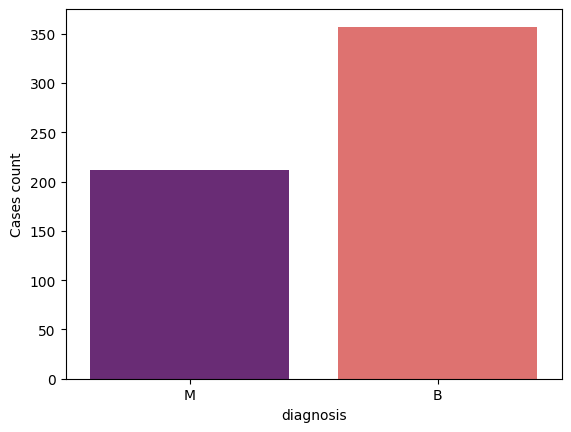

In [4]:
# The 'diagnosis' column is the target.
target = 'diagnosis'

# let's visualize the 'diagnosis' column
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df[target], palette='magma')
# sns.countplot(x='diagnosis', data=df)  # or like this
plt.xlabel("diagnosis")
plt.ylabel('Cases count')
plt.show()

In [5]:
# the 'diagnosis' column is the target:
df[target].value_counts()

'''
M = Malignant
B = Benign
'''

# let's map these to 1 and 0
df[target] = df[target].map({'M':1, 'B':0})

In [6]:
# split the data into X and y
X = df.drop([target], axis=1)  # all columns except 'diagnosis'
y = df[target]  # the 'diagnosis' column

# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
# Implement logistic regression and print the accuracy.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy (Logistic Regression): {accuracy_logreg:.2f}')

Accuracy (Logistic Regression): 0.95


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Implement K Nearest Neighbours and print the accuracy.
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)  # training
y_pred_knn = knn.predict(X_test)  # testing

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy (KNN): {accuracy_knn:.2f}')


Accuracy (KNN): 0.93


In [9]:
# Implement Random Forests and print the accuracy.
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy (Random Forest): {accuracy_rf:.2f}')

Accuracy (Random Forest): 0.95


In [10]:
# Implement Support Vector Machines (SVM) and print the accuracy.
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm:.2f}')

Accuracy (SVM): 0.92


In [ ]:
# So Logistic Regression and Random Forest got the best accuracy: 0.95 .